<a href="https://colab.research.google.com/github/A01749448/momento-retroalimentacion-m2/blob/main/momentoDeRetroalimentacionM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Implementación de una técnica de ML (Sin Framework)

In [176]:
'''
Momento de Retroalimentación: Módulo 2 Implementación de una técnica de 
aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)

Jorge Chávez Badillo A01749448

18-09-2022
'''

# Importación de Librerías 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

## Lectura de Datos

In [177]:
# Dataset 
df = pd.read_csv('/content/Fish.csv', sep = ',')
df = df.head(300)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Entendimiento de Datos

### Verificación de los Tipos de Datos

In [178]:
'''
Observar los tipos de datos del dataset
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Análisis Estadístico

In [179]:
'''
Se obtienen estadísticos generales sobre el dataset para poder 
observar el comportamiento
'''

df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


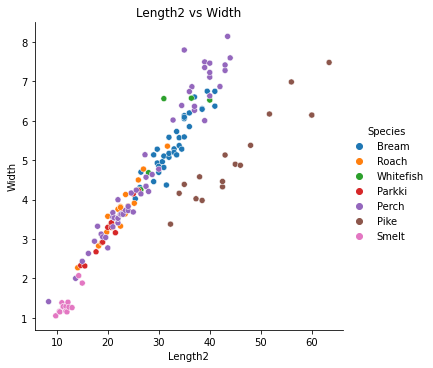

In [180]:
sns.relplot(data = df, x = 'Length2', y = 'Width', hue = 'Species').set(title = 'Length2 vs Width')

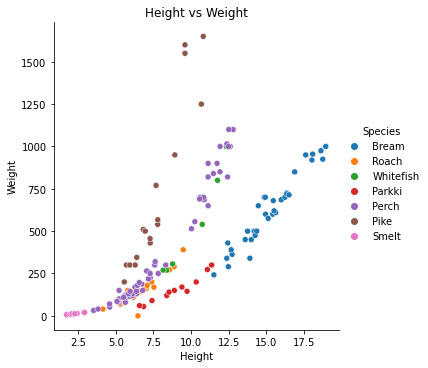

In [181]:
sns.relplot(data = df, x = 'Height', y = 'Weight', hue = 'Species').set(title = 'Height vs Weight')

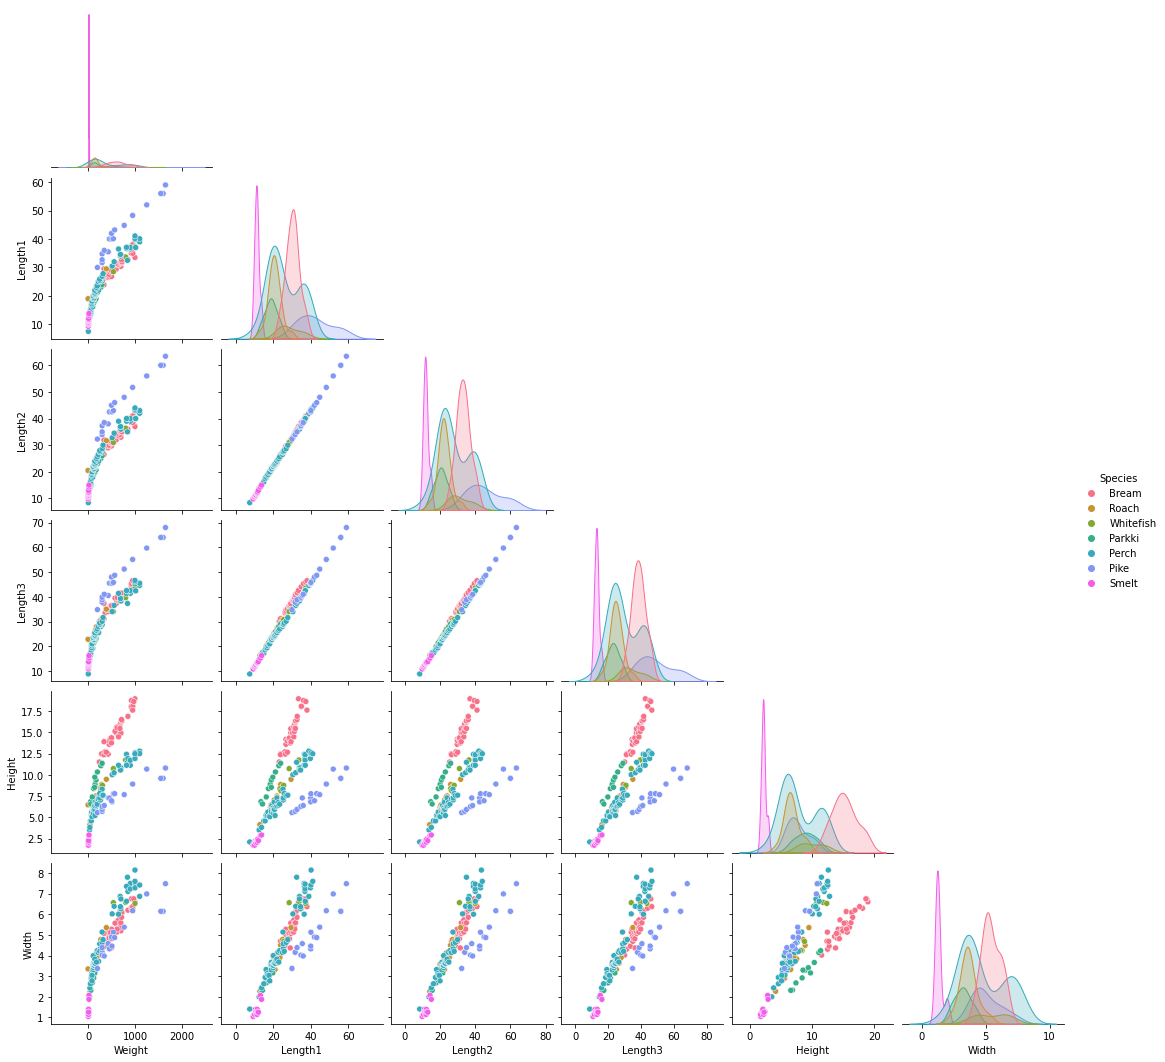

In [182]:
sns.pairplot(df, hue = "Species", palette = "husl", corner = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


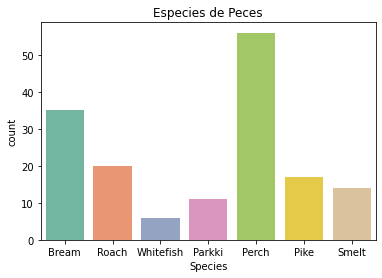

In [183]:
sns.countplot(df['Species'], label="Count", palette = 'Set2').set(title = 'Especies de Peces')
plt.show()

### Búsqueda de Correlaciones

In [184]:
# Matriz de Correlación
correlationMatrix = df.corr()
correlationMatrix.style.background_gradient(cmap='GnBu')

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


## Limpieza y Preparación de los Datos

### Separación del Dataset en Training y Test

In [185]:
'''
Ya que no existen valores nulos, solo es necesario preparar los datos para 
ser procesados por el modelo, separar en valores de entrenamiento y pruebas
'''

x = df.copy()['Length2']
y = df['Width']

# Training y Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

## Modelo Elegido

### Regresión Lineal

In [186]:
def linear_regression(x, y, n_iterations, alpha):
  '''
  Función que implementa la técnica de machine 
  learning de regresión líneal
  '''
  # Función de hipótesis 
  h = lambda x, theta: theta[0] + theta[1] * x
  # Valores iniciales 
  theta = [1, 1]
  #alpha = 0.0001
  n = len(x)

  while n_iterations != 0:
    all_h0 = [] # Todos los valores de h
    delta = []
    deltaX = []

    for x_i, y_i in zip(x, y):
      all_h0.append(h(x_i, theta)) # Valor de h
      delta.append(h(x_i, theta) - y_i) # h0 - y
      deltaX.append((h(x_i, theta) - y_i) * x_i) # h0 - y * x 

    theta[0] = theta[0] - alpha / n * sum(delta)
    theta[1] = theta[1] - alpha / n * sum(deltaX)
    n_iterations -= 1

  print('=' * 100)
  print('Valores de h0: ')
  print(all_h0)
  print('Valores de h0 - y: ')
  print(delta)
  print('Valores de h0 - y * x: ')
  print(deltaX)
  print('Valores de theta: ')
  print(theta)
  print('=' * 100)

  plt.figure(figsize=(10, 8))
  plt.scatter(x, y, marker='.')
  plt.plot(x, all_h0, color = 'green')
  plt.title('Linear Regression for the Wine Dataset')
  plt.xlabel('Alcohol')
  plt.ylabel('Quality')
  plt.show()
  return all_h0

def metricas(real, prediccion):
  correlation_matrix = np.corrcoef(real, prediccion)
  correlation = correlation_matrix[0,1]
  r_squared = correlation**2
  print('=' * 100)
  print('Métricas de Desempeño: ')
  print('Coeficiente de Determinación: ', r_squared)
  print('Accuracy Score: ', metrics.r2_score(real, prediccion))
  print('Mean Squared Error : ', metrics.mean_squared_error(real, prediccion))
  print('Mean Absolute Error: ', metrics.mean_absolute_error(real, prediccion))

### Pruebas con Diferentes Parámetros

Valores de h0: 
[4.125136717936525, 4.831298712509548, 2.0490204538918393, 5.819925504911779, 2.1478831331320625, 1.936034534760156, 3.376605003689121, 3.65906980151833, 3.701439521192712, 1.8371718555199328, 8.362108685374658, 6.526087499484801, 6.102390302740988, 3.772055720650014, 3.927411359456079, 3.6308233217354093, 3.136509925534294, 5.961157903826383, 4.407601515765734, 3.701439521192712, 3.7579324807585532, 3.842671920107316, 4.972531111424152, 6.9497846962286145, 5.396228308167965, 5.396228308167965, 5.254995909253361, 4.972531111424152, 3.0941402058599126, 4.125136717936525, 2.9105380872709263, 4.548833914680339, 2.571580329875876, 6.455471300027498, 4.6476965939205614, 3.489590922820805, 2.741059208573401, 3.418974723363503, 5.608076906539872, 4.901914911966849, 6.102390302740988, 4.972531111424152, 6.384855100570197, 3.6308233217354093, 6.526087499484801, 3.6308233217354093, 4.831298712509548, 4.308738836525511, 2.4444711708527316, 4.407601515765734, 3.390728243580582, 2.2

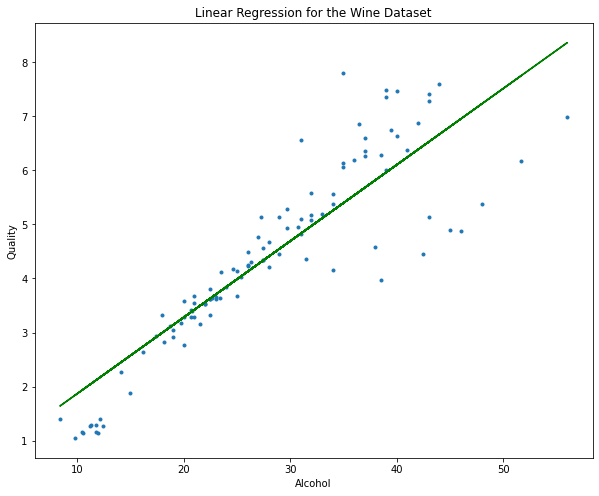

Métricas de Desempeño: 
Coeficiente de Determinación:  0.793586287530212
Accuracy Score:  0.7915653563094885
Mean Squared Error :  0.612704670749488
Mean Absolute Error:  0.5465850770642017


In [187]:
# Prueba 1
prediccion1 = linear_regression(x_train, y_train, 100000, 0.0001)
metricas(y_train, prediccion1)

Valores de h0: 
[4.215782045699204, 4.841233654337877, 2.3769543163015054, 5.7168659064320195, 2.4645175415109195, 2.2768820589193175, 3.5528033405422104, 3.8029839839976796, 3.8405110805160003, 2.1893188337099034, 7.968491697531242, 6.342317515070692, 5.967046549887488, 3.9030562413798675, 4.040655595280376, 3.7779659196521327, 3.340149793605062, 5.841956228159754, 4.465962689154673, 3.8405110805160003, 3.8905472092070936, 3.9656014022437347, 4.9663239760656115, 6.717588480253896, 5.3415949412488155, 5.3415949412488155, 5.21650461952108, 4.9663239760656115, 3.302622697086741, 4.215782045699204, 3.140005278840686, 4.5910530108824075, 2.8397885066941235, 6.279772354206825, 4.678616236091822, 3.6528755979243983, 2.989896892767405, 3.5903304370605307, 5.529230423840417, 4.903778815201744, 5.967046549887488, 4.9663239760656115, 6.217227193342957, 3.7779659196521327, 6.342317515070692, 3.7779659196521327, 4.841233654337877, 4.378399463945259, 2.727207217139162, 4.465962689154673, 3.56531237

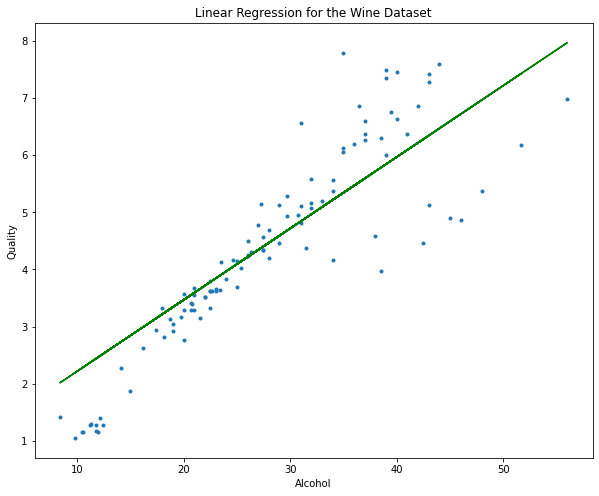

Métricas de Desempeño: 
Coeficiente de Determinación:  0.793586287530212
Accuracy Score:  0.7715680636949751
Mean Squared Error :  0.6714877711512105
Mean Absolute Error:  0.6150016917556069


In [188]:
# Prueba 2
prediccion2 = linear_regression(x_train, y_train, 10000, 0.00001)
metricas(y_train, prediccion2)

Valores de h0: 
[4.0857396695016, 4.826980703031622, 1.9064910309233365, 5.864718149973652, 2.0102647756175394, 1.7878924655585329, 3.3000241739597773, 3.596520587371786, 3.640995049383587, 1.6841187208643298, 8.53318587068173, 6.605959183503674, 6.161214563385661, 3.7151191527365897, 3.8781921801131944, 3.566870946030585, 3.0480022225595698, 6.012966356679657, 4.382236082913608, 3.640995049383587, 3.700294332065989, 3.7892432560895917, 4.975228909737626, 7.050703803621687, 5.419973529855639, 5.419973529855639, 5.271725323149635, 4.975228909737626, 3.0035277605477684, 4.0857396695016, 2.8108050918299625, 4.530484289619613, 2.4550093957355523, 6.531835080150672, 4.634258034313816, 3.4186227393245807, 2.6329072437827574, 3.3444986359715787, 5.642345839914646, 4.901104806384624, 6.161214563385661, 4.975228909737626, 6.45771097679767, 3.566870946030585, 6.605959183503674, 3.566870946030585, 4.826980703031622, 4.278462338219406, 2.3215860097001486, 4.382236082913608, 3.3148489946303776, 2.0

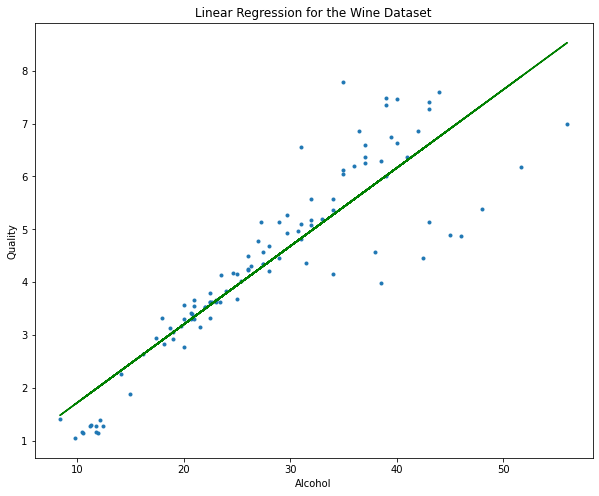

Métricas de Desempeño: 
Coeficiente de Determinación:  0.7935862875302125
Accuracy Score:  0.7935862875294614
Mean Squared Error :  0.606764036429699
Mean Absolute Error:  0.5317626504793294


In [189]:
# Prueba 3
prediccion3 = linear_regression(x_train, y_train, 100000, 0.001)
metricas(y_train, prediccion3)

### Predicciones

Valores de h0: 
[4.591535492715049, 3.439693220843476, 3.8034328856450252, 3.6821863307111755, 5.137144989917372, 5.804001042053546, 5.367513444291687, 5.476635343732152, 5.925247596987395, 3.500316498310401, 4.870402569062903, 6.10711742938817, 5.804001042053546, 6.228363984322019, 2.8334604461742274, 3.233574077455932, 3.621563053244251, 8.22893214073054, 3.536690464790556, 5.197768267384298, 2.7364632022271476, 4.7976546361025925, 3.621563053244251, 8.64117042750563, 3.1002028670286967, 4.591535492715049, 5.197768267384298, 4.167172550446574, 5.804001042053546, 2.2878509489719034, 5.015898434983523, 3.621563053244251, 8.22893214073054, 5.197768267384298, 4.955275157516597, 3.8640561631119503, 4.433914971301044, 5.137144989917372, 5.319014822318147, 3.621563053244251, 4.931025846529828, 2.7728371687073023, 3.8640561631119503, 5.319014822318147, 2.687964580253608, 4.05805065100611, 4.0095520290325695, 4.167172550446574, 5.015898434983523, 4.591535492715049, 5.622131209652771, 2.615216

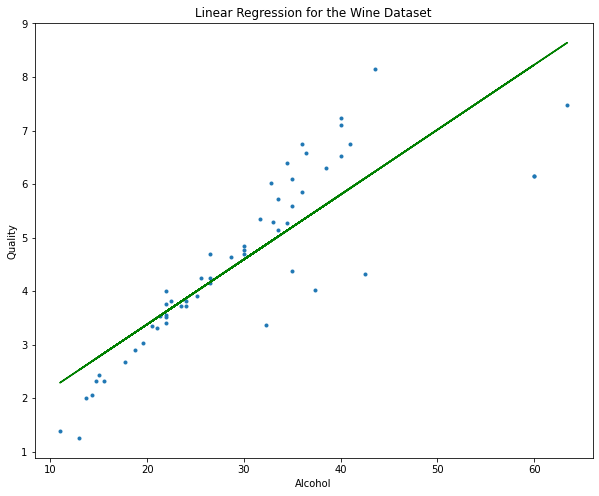

Métricas de Desempeño: 
Coeficiente de Determinación:  0.7198436712238016
Accuracy Score:  0.7198436712238019
Mean Squared Error :  0.725559154433801
Mean Absolute Error:  0.631189376832123


In [190]:
'''
Predicción usando el mejor modelo:
De acuerdo con las métricas de las pruebas anteriores, 
observamos que la predicción 3 tiene un mayor score,
por ello se decide utilizar esa cionfiguración para la 
predicción usando test. 
'''

prediccion_final = linear_regression(x_test, y_test, 100000, 0.001)
metricas(y_test, prediccion_final)

In [191]:
df_x_test = pd.DataFrame(x_test)
df_x_test['Real Width'] = y_test
df_x_test = df_x_test.reset_index().drop(columns = 'index')
df_x_test['Prediction'] = prediccion_final
df_x_test

,Length2,Real Width,Prediction
0,30.0,4.6900,4.591535
1,20.5,3.3516,3.439693
2,23.5,3.7250,3.803433
3,22.5,3.8203,3.682186
4,34.5,6.3875,5.137145
5,40.0,7.2250,5.804001
6,36.4,6.5736,5.367513
7,37.3,4.0198,5.476635
8,41.0,6.7473,5.925248
9,21.0,3.3075,3.500316


In [196]:
print('Valores de Entrada: ')
print(df_x_test['Length2'].head(10))
print('Valores Reales: ')
print(df_x_test['Real Width'].head(10))
print('Predicción: ')
print(df_x_test['Prediction'].head(10))

Valores de Entrada: 
0    30.0
1    20.5
2    23.5
3    22.5
4    34.5
5    40.0
6    36.4
7    37.3
8    41.0
9    21.0
Name: Length2, dtype: float64
Valores de Reales: 
0    4.6900
1    3.3516
2    3.7250
3    3.8203
4    6.3875
5    7.2250
6    6.5736
7    4.0198
8    6.7473
9    3.3075
Name: Real Width, dtype: float64
Predicción: 
0    4.591535
1    3.439693
2    3.803433
3    3.682186
4    5.137145
5    5.804001
6    5.367513
7    5.476635
8    5.925248
9    3.500316
Name: Prediction, dtype: float64
